In [ ]:
from google.colab import drive
drive.mount('/data/')
data_dir = '/data/My Drive/Colab Notebooks/Experiment'
!ls '/data/My Drive/Colab Notebooks/Experiment'
!pip install matplotlib

Mounted at /data/
diamonds.csv  Iris.csv	m_data.csv  TSLA.csv  w_data.csv


In [ ]:
import pandas as pd

df = pd.read_csv(data_dir+'/TSLA.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-05,46.116001,46.916000,45.838001,46.354000,46.354000,22484000
2015-11-06,46.139999,46.672001,45.900002,46.472000,46.472000,12226500
2015-11-09,46.598000,46.598000,44.862000,45.066002,45.066002,19254500
2015-11-10,44.695999,44.740002,43.216000,43.299999,43.299999,23085000
2015-11-11,43.554001,43.896000,42.726002,43.816002,43.816002,16739000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2015-11-05 to 2020-11-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


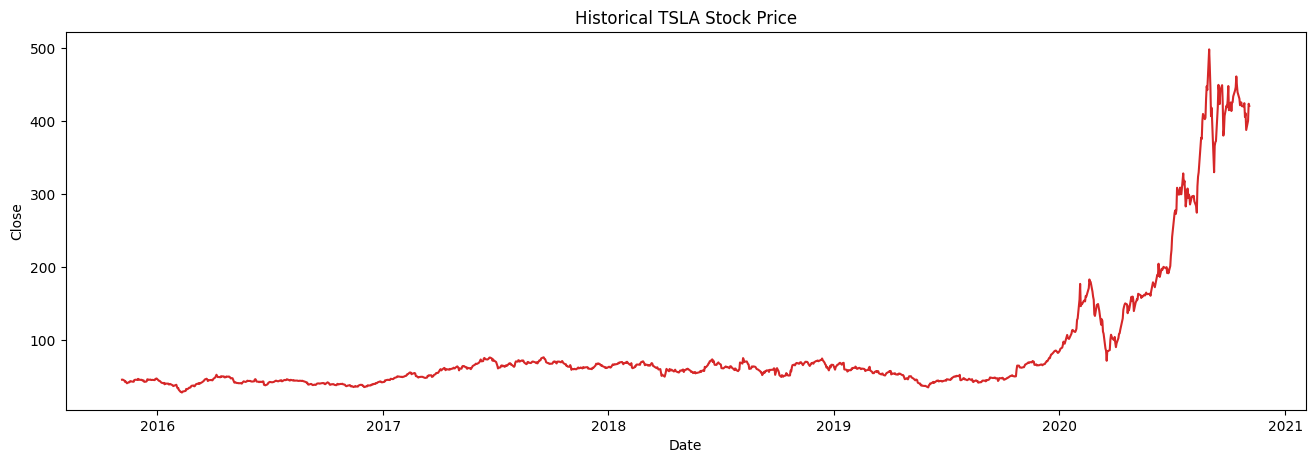

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Close', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.Close, title='Historical TSLA Stock Price')

In [ ]:
df.index

DatetimeIndex(['2015-11-05', '2015-11-06', '2015-11-09', '2015-11-10',
               '2015-11-11', '2015-11-12', '2015-11-13', '2015-11-16',
               '2015-11-17', '2015-11-18',
               ...
               '2020-10-22', '2020-10-23', '2020-10-26', '2020-10-27',
               '2020-10-28', '2020-10-29', '2020-10-30', '2020-11-02',
               '2020-11-03', '2020-11-04'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

Resampling

In [ ]:
df_daily = df.resample('D').sum()
df_daily

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-05,46.116001,46.916000,45.838001,46.354000,46.354000,22484000
2015-11-06,46.139999,46.672001,45.900002,46.472000,46.472000,12226500
2015-11-07,0.000000,0.000000,0.000000,0.000000,0.000000,0
2015-11-08,0.000000,0.000000,0.000000,0.000000,0.000000,0
2015-11-09,46.598000,46.598000,44.862000,45.066002,45.066002,19254500
...,...,...,...,...,...,...
2020-10-31,0.000000,0.000000,0.000000,0.000000,0.000000,0
2020-11-01,0.000000,0.000000,0.000000,0.000000,0.000000,0
2020-11-02,394.000000,406.980011,392.299988,400.510010,400.510010,29021100


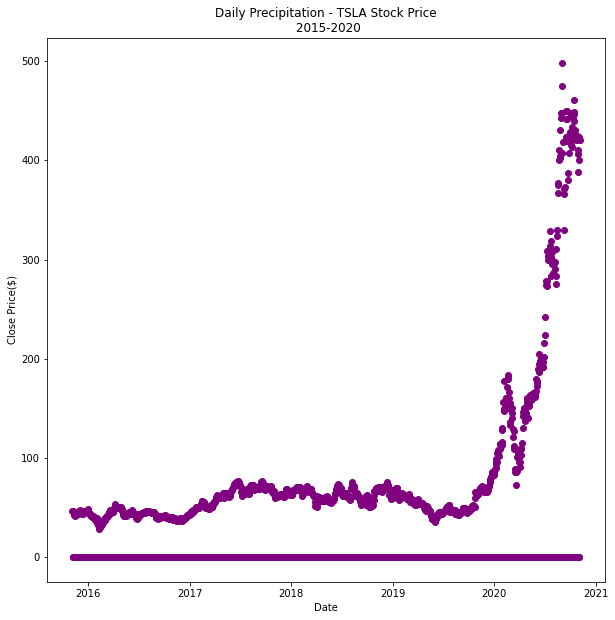

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(df_daily.index.values,
           df_daily['Close'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Close Price($)",
       title="Daily Precipitation - TSLA Stock Price\n 2015-2020")

plt.show()

In [ ]:
df_monthly = df.resample('M').sum()

df_monthly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-30,752.610014,763.438001,740.328012,752.774003,752.774003,267508000
2015-12-31,1012.442006,1027.931998,998.047997,1012.756001,1012.756001,299227500
2016-01-31,786.454006,794.652000,761.091994,777.336002,777.336002,396236000
2016-02-29,679.249992,701.496000,655.246003,678.680005,678.680005,668529000
2016-03-31,946.001987,967.810004,929.591996,951.047991,951.047991,514610000
...,...,...,...,...,...,...
2020-07-31,6445.736052,6666.546037,6188.860061,6424.619935,6424.619935,1893612000
2020-08-31,7444.757964,7714.516022,7273.335998,7561.253936,7561.253936,1557876400
2020-09-30,8699.940032,8993.409975,8308.979982,8683.400024,8683.400024,1736563100


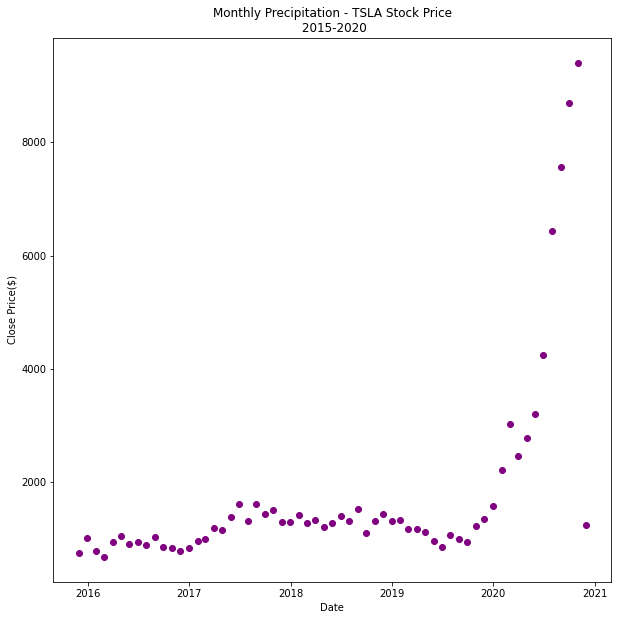

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(df_monthly.index.values,
           df_monthly['Close'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Close Price($)",
       title="Monthly Precipitation - TSLA Stock Price\n 2015-2020")

plt.show()

In [ ]:
df_weekly = df.resample('W').sum()

df_weekly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-08,92.256000,93.588001,91.738003,92.826000,92.826000,34710500
2015-11-15,221.008000,221.632001,214.640004,216.208004,216.208004,90809500
2015-11-22,215.964006,220.709999,212.720002,218.238000,218.238000,73955500
2015-11-29,177.024006,180.652001,175.414001,179.450001,179.450001,54733500
2015-12-06,233.558008,236.319999,229.804000,232.505997,232.505997,74442500
...,...,...,...,...,...,...
2020-10-11,2135.580017,2165.910004,2090.989960,2124.880005,2124.880005,206343600
2020-10-18,2239.880005,2276.050018,2203.880005,2238.799988,2238.799988,189748500
2020-10-25,2164.450011,2179.820038,2101.059998,2121.830018,2121.830018,174024800


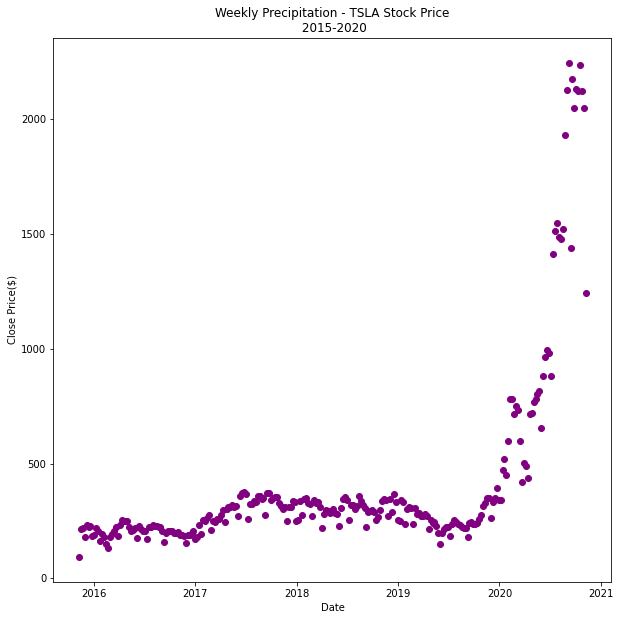

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(df_weekly.index.values,
           df_weekly['Close'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Close Price($)",
       title="Weekly Precipitation - TSLA Stock Price\n 2015-2020")

plt.show()

In [ ]:
df.reset_index(inplace=True)
df['year'] = [d.year for d in df.Date]
df['month']= [d.month for d in df.Date]
years = df['year'].unique()

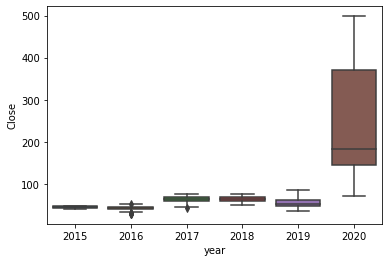

In [ ]:
import seaborn as sns
sns.boxplot(x='year', y='Close', data=df)


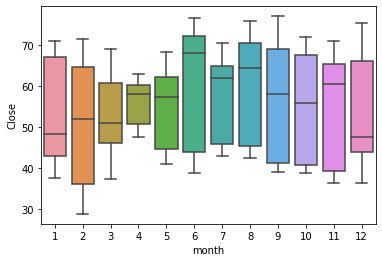

In [ ]:
sns.boxplot(x='month', y='Close', data=df.loc[~df.year.isin([2019, 2020]), :])

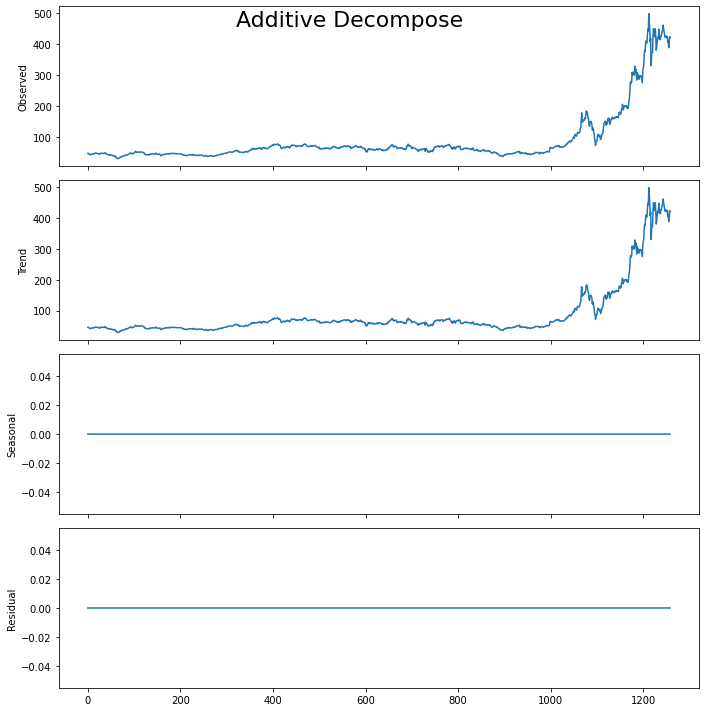

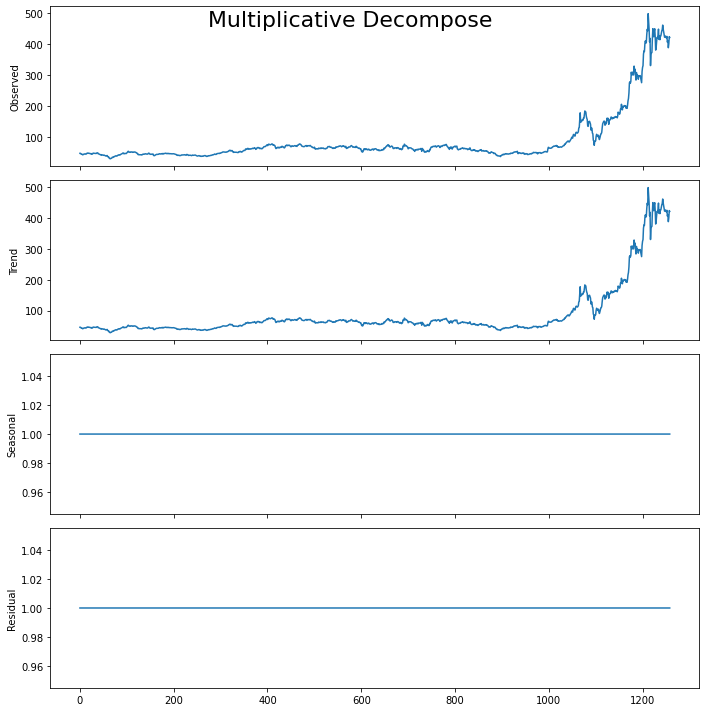

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_add = seasonal_decompose(df['Close'], model='additive', freq=1)
df_mul = seasonal_decompose(df['Close'], model='multiplicative', freq=1)

plt.rcParams.update({'figure.figsize': (10,10)})
df_add.plot().suptitle('Additive Decompose', fontsize=22)
df_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)

plt.show()

In [ ]:
df_new = pd.concat([df_mul.seasonal, df_mul.trend, df_mul.resid, df_mul.observed], axis=1)
df_new.columns = ['seas', 'trend', 'resid', 'actual_values']
df_new.head()

,seas,trend,resid,actual_values
0,1.0,46.354000,1.0,46.354000
1,1.0,46.472000,1.0,46.472000
2,1.0,45.066002,1.0,45.066002
3,1.0,43.299999,1.0,43.299999
4,1.0,43.816002,1.0,43.816002


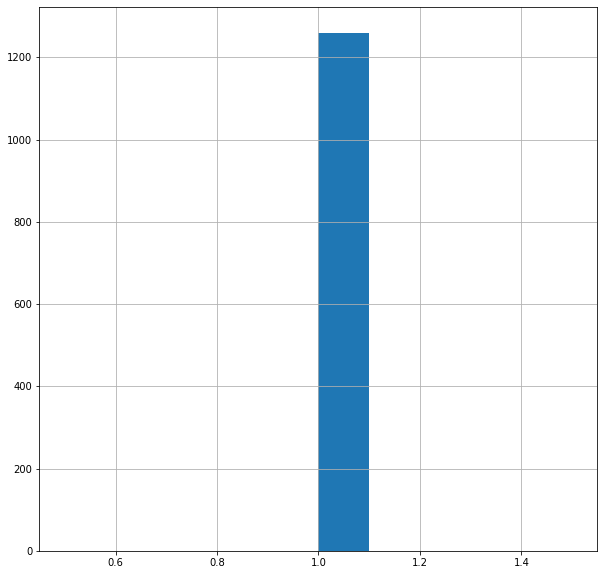

In [ ]:
df_new['resid'].hist()

In [ ]:
df_new_add = pd.concat([df_add.seasonal, df_add.trend, df_add.resid, df_add.observed], axis=1)
df_new_add.columns = ['seas', 'trend', 'resid', 'actual_values']
df_new_add.head()

,seas,trend,resid,actual_values
0,0.0,46.354000,0.0,46.354000
1,0.0,46.472000,0.0,46.472000
2,0.0,45.066002,0.0,45.066002
3,0.0,43.299999,0.0,43.299999
4,0.0,43.816002,0.0,43.816002


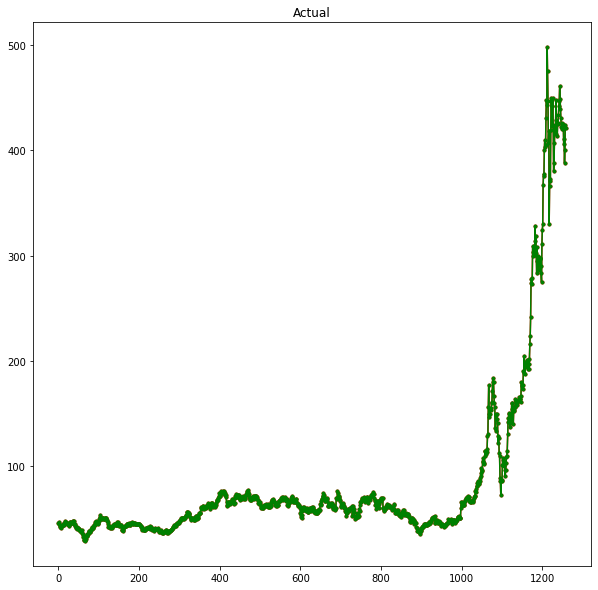

In [ ]:
df_new['denoised']=df_new['seas']*df_new['trend']

df_new['denoised'].plot(title='denoised', label='denoised', color='red', style=".-")
df_new['actual_values'].plot(title='Actual', label='Actual', color='green', style=".-")

Autocorrelation

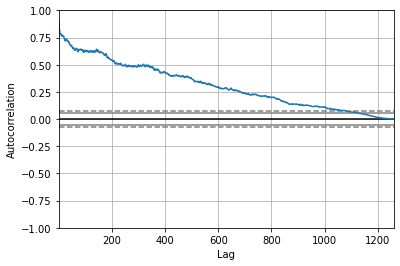

In [ ]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

autocorrelation_plot(df)
pyplot.show()

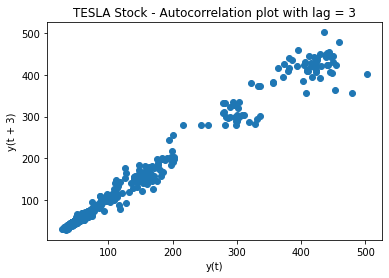

In [ ]:
from pandas.plotting import lag_plot

plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

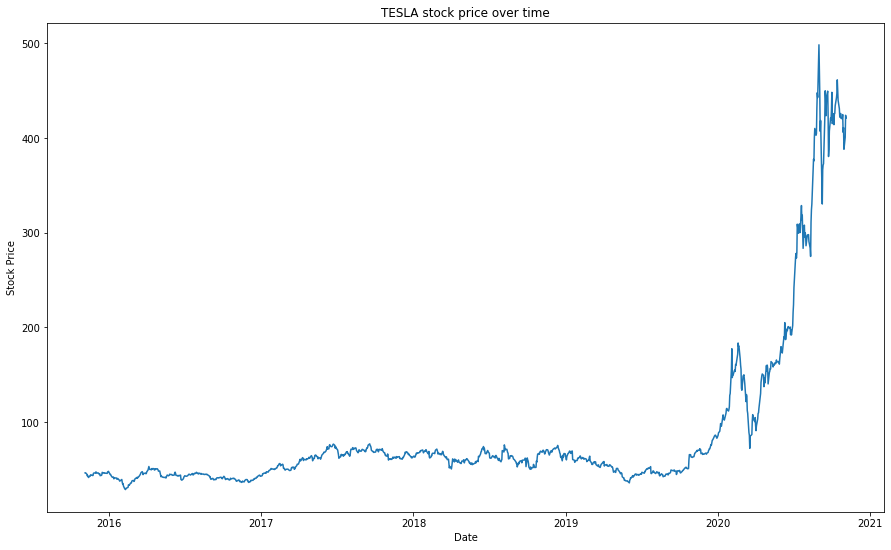

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(df.index, df["Close"])

plt.title("TESLA stock price over time")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]

training_data = train_data['Close'].values
test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 132.23721468078327


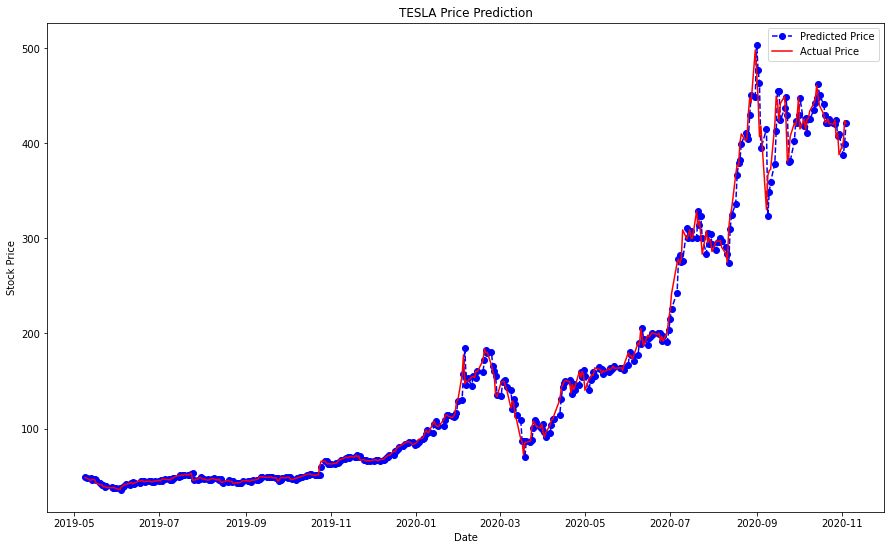

In [ ]:
test_set_range = df[int(len(df)*0.7):].index

plt.figure(figsize=(15,9))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')

plt.title('TESLA Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Second Attempt

In [ ]:
train_data_2, test_data_2 = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]

training_data_2 = train_data_2['Close'].values
test_data_2 = test_data_2['Close'].values

history_2 = [x for x in training_data_2]
model_predictions_2 = []
N_test_observations_2 = len(test_data_2)

for time_point in range(N_test_observations_2):
    model2 = ARIMA(history_2, order=(5,1,0))
    model_fit2 = model2.fit(disp=0)
    output = model_fit2.forecast()
    yhat_2 = output[0]
    model_predictions_2.append(yhat_2)
    true_test_value = test_data_2[time_point]
    history_2.append(true_test_value)
    
MSE_error_2 = mean_squared_error(test_data_2, model_predictions_2)
print('Testing Mean Squared Error is {}'.format(MSE_error_2))

Testing Mean Squared Error is 130.0743387237251


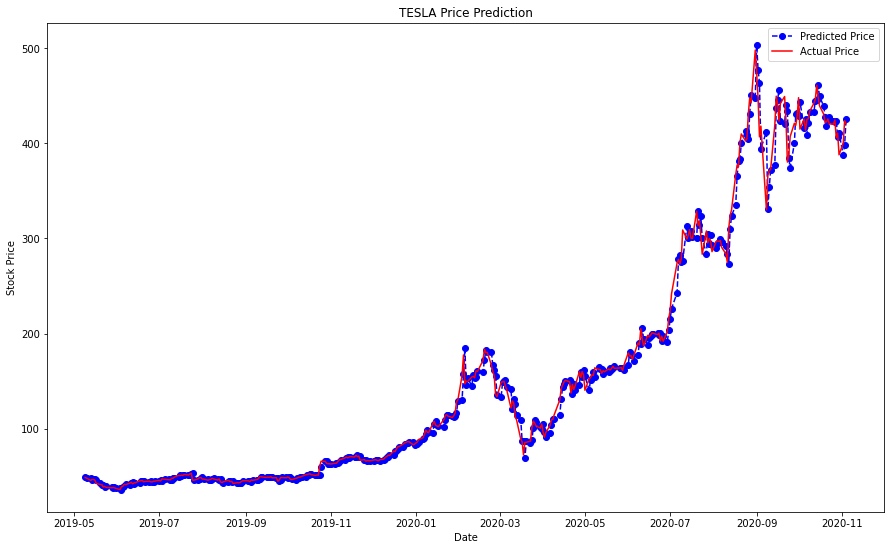

In [ ]:
test_set_range = df[int(len(df)*0.7):].index

plt.figure(figsize=(15,9))
plt.plot(test_set_range, model_predictions_2, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data_2, color='red', label='Actual Price')

plt.title('TESLA Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()